Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 5.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 4.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 18.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


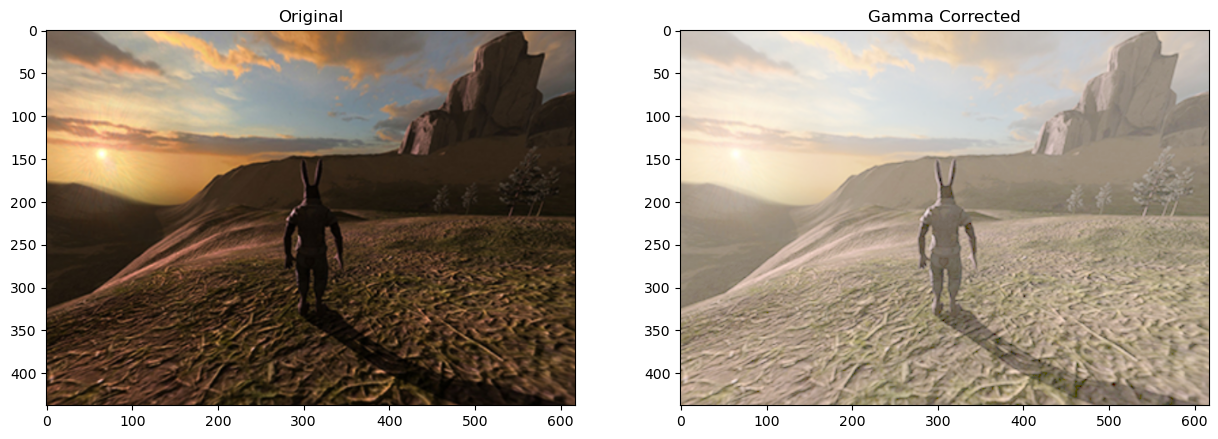

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.29

img_zayka=cv2.imread("/Users/230696/Downloads/3.png")

lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction using the lookup table
out = cv2.LUT(img_zayka, lookUpTable)

# Display original and corrected images side by side
plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.imshow(img_zayka[..., ::-1])  # Convert BGR → RGB
plt.title("Original")
plt.subplot(122)
plt.imshow(out[..., ::-1])
plt.title("Gamma Corrected")
plt.show()

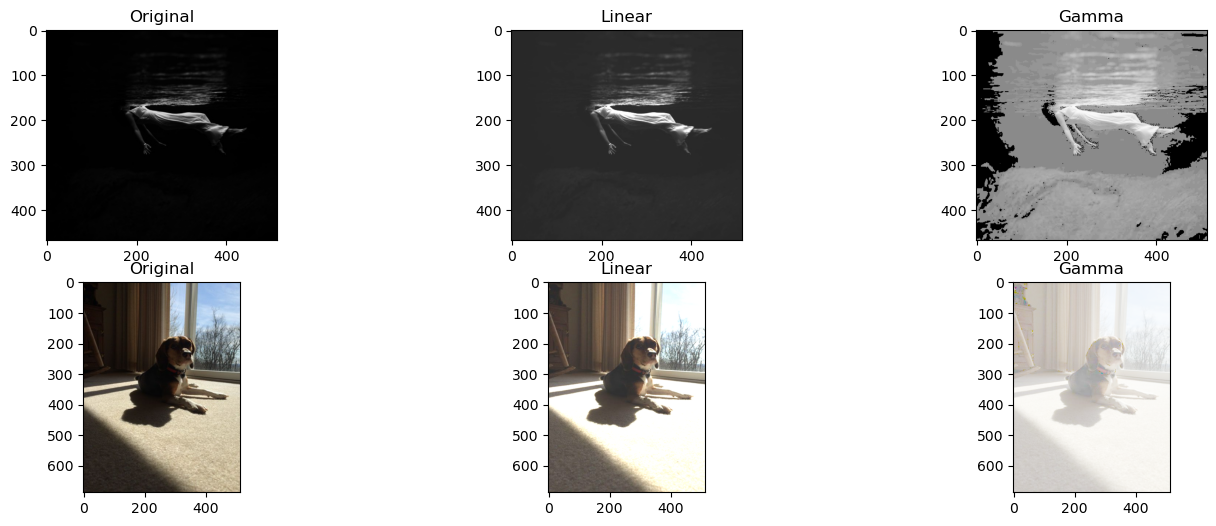

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt

gamma = 0.11

img_png5 = cv2.imread("/Users/230696/Downloads/5.jpg")
img_png2 = cv2.imread("/Users/230696/Downloads/2.png")
# Apply linear brightness and contrast adjustment
output_linear1 = cv2.convertScaleAbs(img_png5, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_png2, alpha=1.3, beta=40)

# Prepare lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction
output_gammacorrected1 = cv2.LUT(img_png5, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_png2, lookUpTable)

# Display original, linear, and gamma-corrected images side by side
plt.figure(figsize=[17,6])

plt.subplot(231)
plt.imshow(img_png5[..., ::-1])
plt.title("Original")
plt.subplot(232)
plt.imshow(output_linear1[..., ::-1])
plt.title("Linear")
plt.subplot(233)
plt.imshow(output_gammacorrected1[..., ::-1])
plt.title("Gamma")

plt.subplot(234)
plt.imshow(img_png2[..., ::-1])
plt.title("Original")
plt.subplot(235)
plt.imshow(output_linear2[..., ::-1])
plt.title("Linear")
plt.subplot(236)
plt.imshow(output_gammacorrected2[..., ::-1])
plt.title("Gamma")

plt.show()

In [21]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import os

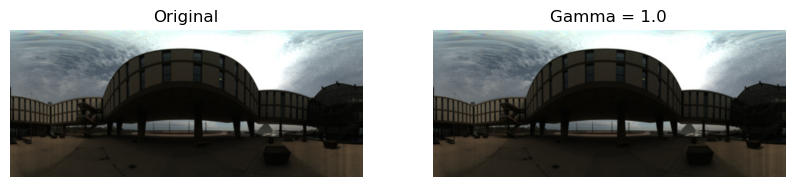

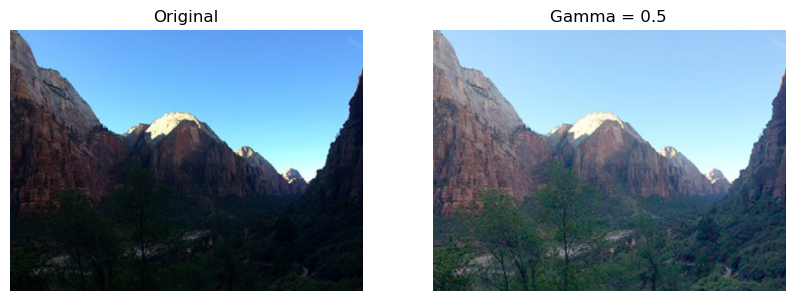

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(I_in, c, gamma):
    """
    Apply power law (gamma) transformation to an input image.
    """
    if I_in is None:
        return None

    # Normalize image to range [0,1]
    I_norm = I_in.astype('float32') / 255.0

    # Apply power law transformation
    I_gamma = c * (I_norm ** gamma)

    # Rescale to 0-255 and convert to uint8
    I_out = np.clip(I_gamma * 255, 0, 255).astype('uint8')

    return I_out


# Paths
image_folder = "/Users/230696/Downloads"
output_folder = "/Users/230696/Downloads"

os.makedirs(output_folder, exist_ok=True)

gamma_values = {
    "4.png": 1.0,
    "1.png": 0.5,
}

c = 1.0

for img_name, gamma in gamma_values.items():
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        continue

    img_gamma = gamma_correction(img, c, gamma)

    # Save output
    output_path = os.path.join(output_folder, f"gamma_{img_name}")
    cv2.imwrite(output_path, img_gamma)

    # ALL plt lines must align with the code above
    plt.figure(figsize=(10, 5)) 
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Gamma = {gamma}")
    plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

